### MF Assignment Submission

#### 1. We know that speech signal is one dimensional vector. Different vector transformations can be applied on the speech signal to enhance its quality. Explore the following vector transformations on the speech signal.

1. Record your voice signal for 30 seconds (speak slow and record) and play it in python. 

In [2]:
import sounddevice as sd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

In [17]:
# Record audio
fs = 44100  # Sample rate
duration = 30  # Duration of recording in seconds
print("Recording...")
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
print("Recording finished")

# Save the original audio to a WAV file
wavfile.write("original_audio.wav", fs, myrecording)

# Play the recorded audio
sd.play(myrecording, fs, blocking=True)

Recording...
Recording finished


Here recorded the voice and stored for future reference to understand the difference between transformations

2. Print the shape of the signal. Is it a 1D vector ?

In [18]:
print("Shape of the signal:", myrecording.shape)

Shape of the signal: (1323000, 1)


Yes, It is 1D Vector

3. Plot the signal. Can u able to roughly tell how many words/sentences spoken?

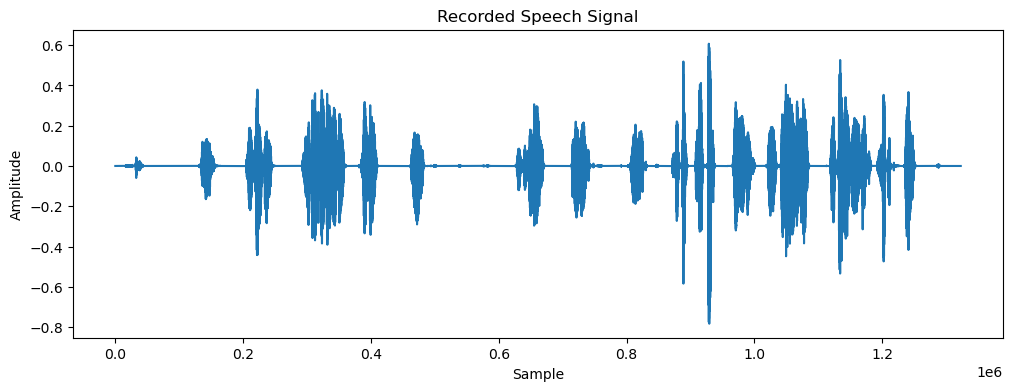

In [19]:
# Plot the signal
plt.figure(figsize=(12, 4))
plt.plot(myrecording)
plt.title("Recorded Speech Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

By Analyzing the above plot, we can come to conclusion that its have around 15 to 20 words in the speach.

4. Take only the first 15 seconds of your speech signal  
5. Down sample the speech vector by 2 (Pick one sample for every two sample)

In [21]:
# Convert to 1D numpy array to apply the transformation easily 
audio_data = np.squeeze(myrecording)
# Take only the first 15 seconds of the signal
first_15_seconds = audio_data[:int(15 * fs)]

# Downsample the signal by 2
downsampled_audio = audio_data[::2]

In [22]:
sd.play(downsampled_audio, fs, blocking=True)

* Post DownSampling the original audio, the speed of the speech is increased two times faster. though we haven't used the 15 seconds of the audio the duration of the audio is reduced to 15 seconds, without loosing the entire speech.

6. Upsample the speech vector by 2 (Introduce one sample newly between every two 
sample)

In [23]:
# Upsample the signal by 2 (introducing zeros)
upsampled_audio = np.zeros(len(audio_data) * 2)
upsampled_audio[::2] = audio_data

sd.play(upsampled_audio, fs, blocking=True)

* Post Up Sampling the original audio, the voice in the speech is completely changed, where you can feel like Kreepy Old Man voice on Horror movie.

In [24]:
wavfile.write('./recordings/original_audio.wav', fs, myrecording)
wavfile.write('./recordings/original_audio_down_by_2.wav', fs, downsampled_audio)
wavfile.write('./recordings/original_audio_upsampled_by_2_filled_with_zero.wav', fs, upsampled_audio)


7. Apply the following transformations on the speech signal and try to hear to 
    * 3*Speech signal 
    * 0.5*Speech signal 
    * exp(0.5*speech signal) 
    * ln(speech signal) 
    * Cos (Speech Signal) 
    * Speech signal + normal_random_noise of same length of speech signal

In [30]:
# 1. 3 * Speech signal
transformed_audio = 3 * audio_data
sd.play(transformed_audio, fs, blocking=True)

In [31]:
# 2. 0.5 * Speech signal
transformed_audio = 0.5 * audio_data
sd.play(transformed_audio, fs, blocking=True)

wavfile.write('./recordings/original_audio_mult_by_point5.wav', fs, transformed_audio)

In [34]:
# 3. exp(0.5 * speech signal)
transformed_audio = np.exp(0.5 * audio_data)
sd.play(transformed_audio, fs, blocking=True)

wavfile.write('./recordings/original_audio_exponent.wav', fs, transformed_audio)

In [35]:
# 4. ln(speech signal) (handle potential negative values or zeros)
audio_data_positive = audio_data + np.abs(np.min(audio_data)) + 1e-6  # Ensure positive values
transformed_audio = np.log(audio_data_positive)
sd.play(transformed_audio, fs, blocking=True)

wavfile.write('./recordings/original_audio_ln.wav', fs, transformed_audio)

In [37]:
# 5. Cos(Speech Signal)
transformed_audio = np.cos(audio_data)
sd.play(transformed_audio, fs, blocking=True)

wavfile.write('./recordings/original_audio_cosine.wav', fs, transformed_audio)

* After Listening to the Cosine Transformation, the speech voice modulation in the audio is completly changed. but didn't find much difference in the other previuos transformations

In [43]:
# 6. Speech signal + normal random noise
noise = np.random.normal(0, 2, len(audio_data))
transformed_audio = audio_data + noise

sd.play(transformed_audio, fs, blocking=True)

wavfile.write('./recordings/original_audio_noise_added2.wav', fs, transformed_audio)

* Here adding higher value of normal noise makes the audio unclear. and if we make sure the random scale to be with 0.1 range then the audio can be listened without much noise, as we increase the random scale value the sentence in the audio will not able to listen. i.e **np.random.normal(0, 0.1, <size>)** or below 0.1, will give less noise. if the scaling values are more high compared to these range the noise will become more and sentences in the audio will be lost.

#### 2. We know that image is a 2D data, which is nothing but a matrix. Apply different matrix transformations on the following image. 
 
1. Is the cameraman coat have any packets in it ? Apply different transformations on this image to visually prove the answer for this question. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

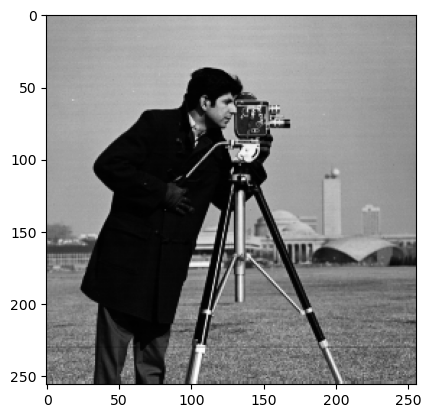

In [1]:
import cv2

# image = cv2.imread('./Mini-Test/cameraman.png', )
Image_URL = './Mini-Test/cameraman.png'
image = cv2.imread(Image_URL, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='grey')
plt.show()

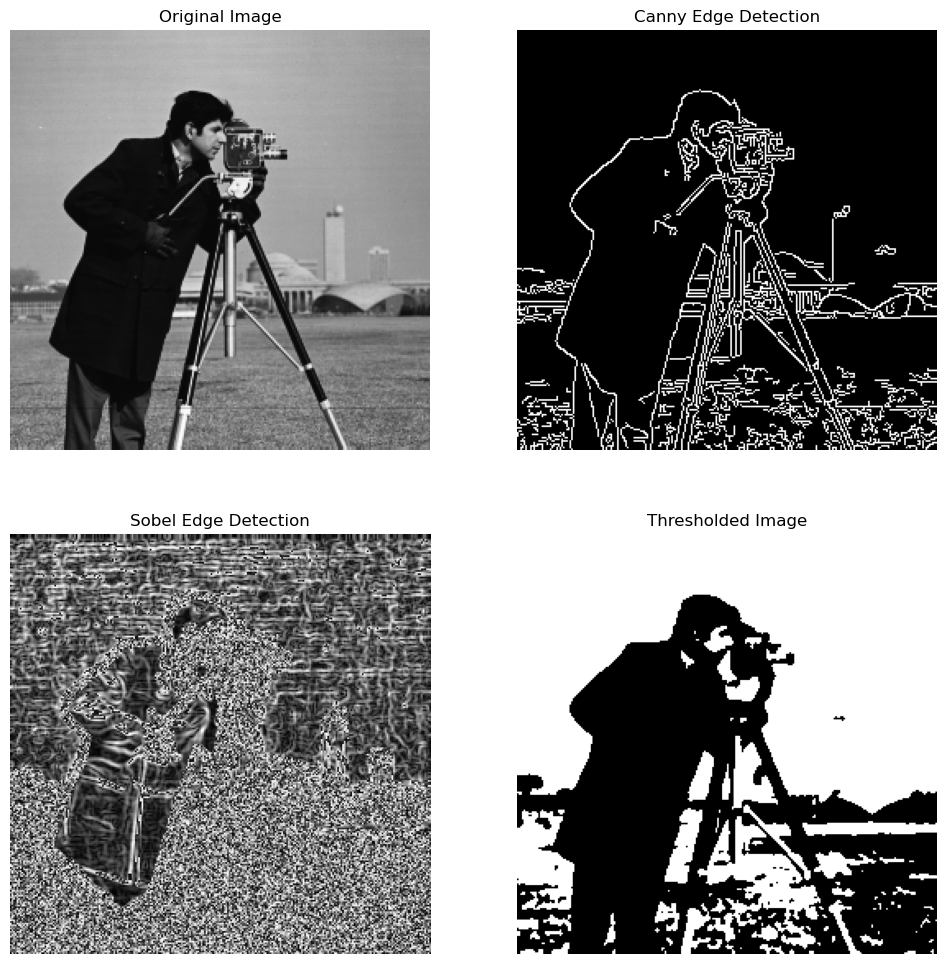

: 

In [5]:
def edge_detection(image_path): 
    # Load the image 
    image = cv2.imread(image_path)  
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply thresholding to isolate potential objects (packets)
    ret, thresholded_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)
    
    # Convert the image to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

    # Apply Canny edge detection 
    edges_canny = cv2.Canny(gray_image, threshold1=100, threshold2=200) 
    
    # Apply Sobel edge detection 
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5) 
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5) 
    sobel_edges = np.hypot(sobel_x, sobel_y) 
 
    sobel_edges = np.uint8(sobel_edges) 
 
    # Display the original and edge-detected images 
    plt.figure(figsize=(12, 12)) 
    plt.subplot(2, 2, 1) 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.title('Original Image') 
    plt.axis('off') 
    
    plt.subplot(2, 2, 2) 
    plt.imshow(edges_canny, cmap='gray') 
    plt.title('Canny Edge Detection') 
    plt.axis('off') 

    plt.subplot(2, 2, 3) 
    plt.imshow(sobel_edges, cmap='gray') 
    plt.title('Sobel Edge Detection') 
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title("Thresholded Image")
    plt.axis('off')
    plt.show() 
    
edge_detection(Image_URL)

From the given image **we can find pockets on the coat** using Sobel Transformation there are grey line which can describe like opened pocket from the right side of coat.

2. Create the negative version of this image 


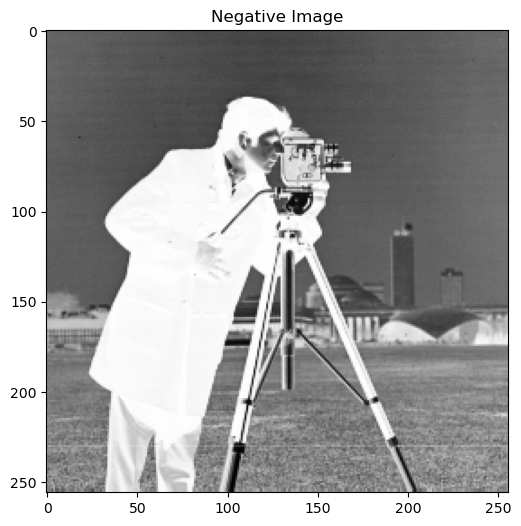

In [63]:
negative_image = 255 - image

# Display the negative image
plt.figure(figsize=(6, 6))
plt.imshow(negative_image, cmap='gray')
plt.title("Negative Image")
plt.show()

3. Rotate the image by an angles 45deg, 90 deg.

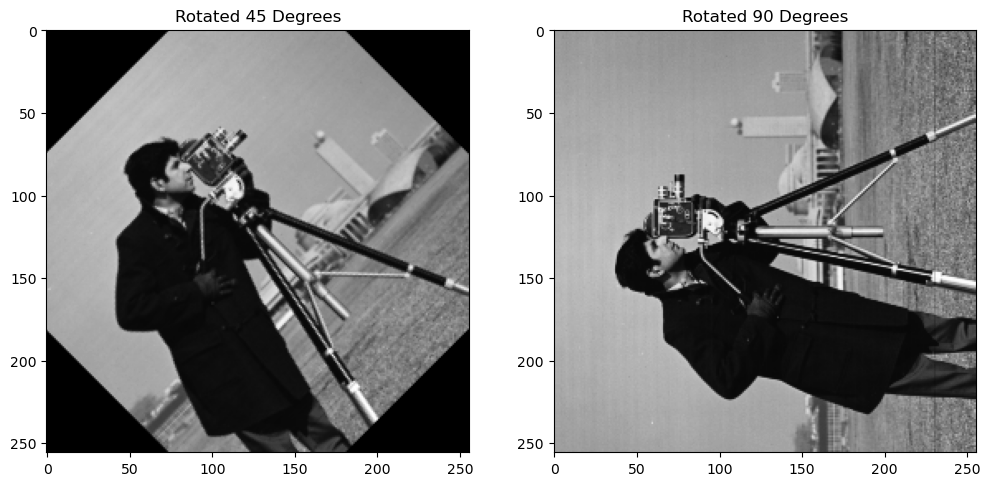

In [64]:
rows, cols = image.shape
M45 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated45 = cv2.warpAffine(image, M45, (cols, rows))

M90 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
rotated90 = cv2.warpAffine(image, M90, (cols, rows))

# Display the rotated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rotated45, cmap='gray')
plt.title("Rotated 45 Degrees")

plt.subplot(1, 2, 2)
plt.imshow(rotated90, cmap='gray')
plt.title("Rotated 90 Degrees")

plt.show()


4. Horizontally flip the image 

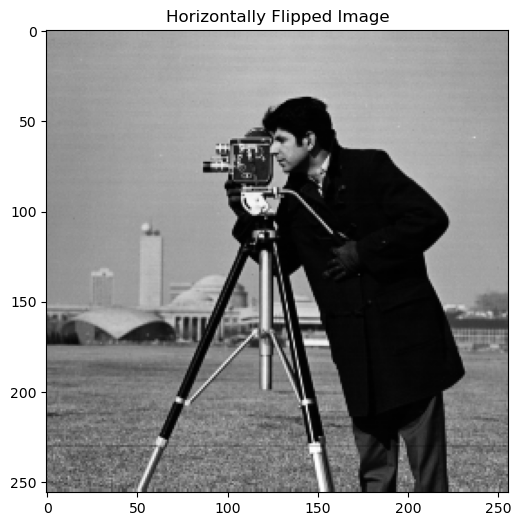

In [65]:
flipped_image = cv2.flip(image, 1)

# Display the flipped image
plt.figure(figsize=(6, 6))
plt.imshow(flipped_image, cmap='gray')
plt.title("Horizontally Flipped Image")
plt.show()

5. Zoom out the image using any matrix interpolation (up-sampling)

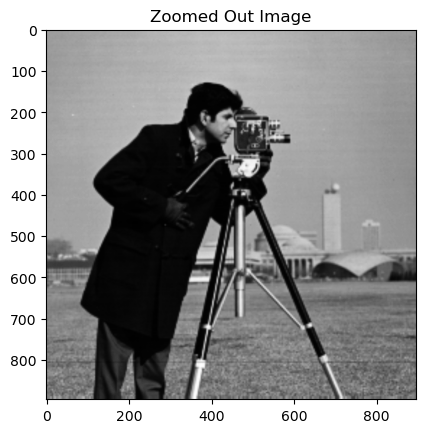

In [69]:

scale_factor = 1.5  # Adjust this value for different zoom levels 1.5 defines 150%

width = int(image.shape[1] * scale_factor)
height = int(image.shape[0] * scale_factor)
dim = (width, height)

# Resize using linear interpolation
zoomed_out_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

plt.imshow(zoomed_out_image, cmap='gray')
plt.title("Zoomed Out Image")
plt.show()

#### 3. Lung_Feat.csv is a dataset of features extracted from the lung nodules(tumors). Refer the below  article  to  understand  about  these  features  and  its  extraction  process  from  CT scan.  https://www.scielo.br/j/babt/a/GCTFby9bSBLsynRm44hZYNB/?lang=en 


This data consist of 24 columns, in which the first 23 columns are defining the tumor shape and texture characteristics. Apply the dimensionality reduction technique to derive the new fewer feature components to represent the original tumor characteristics without losing more than  5  percent  of  information.  Also  list  the  top  5  features  in  the  first  five  principle components.  

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('./Mini-Test/Lung_feat.csv')

data.head()

,Area,diameter,perimeter,circularity,homogeneity,compactness,homogeneity.1,3d bounding box dim rate,compactness2,clbp mean,...,energy,skew inside,kurtosis inside,moment 2,MIP,moment 5,moment 6,moment 7,x-y plane bb rate,T
0,61.8750,12.00,32.077140,0.755673,449.71875,1.345392,1.000000,0.758333,2.339759,14.650000,...,10.149219,0.462735,3.076589,238.764450,276.318695,65971.18750,15752872.0,368197.28130,19.111872,NON-CANCEROUS
1,14.0625,7.50,16.749615,0.629887,56.30625,1.615692,0.900000,0.693333,2.105107,7.850000,...,5.401159,0.182834,1.547886,313.565430,318.816223,99969.98438,31347990.0,13273.56641,19.048378,NON-CANCEROUS
2,11.8125,15.75,13.560380,0.807250,127.96875,1.574249,0.333333,0.333333,3.415881,11.400000,...,5.017380,0.095425,1.444559,331.105621,275.847107,91334.75781,30241724.0,11021.21387,19.080124,NON-CANCEROUS
3,20.2500,9.75,21.604931,0.545166,258.86250,1.529404,0.923077,0.494505,3.196538,15.316667,...,4.719527,-0.396786,1.803046,196.050644,245.214554,48072.80469,9425374.0,22393.75195,19.111872,NON-CANCEROUS
4,13.5000,11.25,15.744046,0.684401,127.23750,1.334365,0.866667,0.693333,3.898952,13.400000,...,5.003018,-0.555117,2.040902,315.546234,252.875107,79794.33594,25179706.0,13486.62402,19.080124,NON-CANCEROUS


In [71]:
X = data.drop(columns=['T'])

X.head()

,Area,diameter,perimeter,circularity,homogeneity,compactness,homogeneity.1,3d bounding box dim rate,compactness2,clbp mean,...,DC constant,energy,skew inside,kurtosis inside,moment 2,MIP,moment 5,moment 6,moment 7,x-y plane bb rate
0,61.8750,12.00,32.077140,0.755673,449.71875,1.345392,1.000000,0.758333,2.339759,14.650000,...,1.001611,10.149219,0.462735,3.076589,238.764450,276.318695,65971.18750,15752872.0,368197.28130,19.111872
1,14.0625,7.50,16.749615,0.629887,56.30625,1.615692,0.900000,0.693333,2.105107,7.850000,...,1.002350,5.401159,0.182834,1.547886,313.565430,318.816223,99969.98438,31347990.0,13273.56641,19.048378
2,11.8125,15.75,13.560380,0.807250,127.96875,1.574249,0.333333,0.333333,3.415881,11.400000,...,1.002419,5.017380,0.095425,1.444559,331.105621,275.847107,91334.75781,30241724.0,11021.21387,19.080124
3,20.2500,9.75,21.604931,0.545166,258.86250,1.529404,0.923077,0.494505,3.196538,15.316667,...,1.002237,4.719527,-0.396786,1.803046,196.050644,245.214554,48072.80469,9425374.0,22393.75195,19.111872
4,13.5000,11.25,15.744046,0.684401,127.23750,1.334365,0.866667,0.693333,3.898952,13.400000,...,0.980073,5.003018,-0.555117,2.040902,315.546234,252.875107,79794.33594,25179706.0,13486.62402,19.080124


In [72]:
# Standardize the features
x = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(0.95)  # Keep 95% of the variance
principalComponents = pca.fit_transform(x)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the number of components and explained variance
print("Number of components:", pca.n_components_)
print("Explained variance ratio:", explained_variance_ratio.sum())


Number of components: 10
Explained variance ratio: 0.9524169077181799


In [74]:
print("\nTop 5 features in the first five principal components:")

# Get the loadings (weights) of the principal components
loadings = pca.components_

for i in range(min(5, pca.n_components_)):  # Iterate through the first 5 components (or fewer if available)
    component_loadings = loadings[i]
    top_feature_indices = np.argsort(np.abs(component_loadings))[::-1][:5]  # Top 5 features with highest absolute loadings
    print(f"\nComponent {i + 1}:")
    for feature_index in top_feature_indices:
        print(f"  - Feature {feature_index + 1} -> ({X.columns[feature_index]}) (Loading: {component_loadings[feature_index]:.3f})")



Top 5 features in the first five principal components:

Component 1:
  - Feature 14 -> (DC constant) (Loading: 0.313)
  - Feature 6 -> (compactness) (Loading: 0.262)
  - Feature 17 -> (kurtosis inside) (Loading: 0.258)
  - Feature 19 -> (MIP) (Loading: 0.247)
  - Feature 8 -> (3d bounding box dim rate) (Loading: 0.246)

Component 2:
  - Feature 20 -> (moment 5) (Loading: -0.366)
  - Feature 1 -> (Area) (Loading: 0.363)
  - Feature 22 -> (moment 7) (Loading: 0.362)
  - Feature 21 -> (moment 6) (Loading: -0.361)
  - Feature 5 -> (homogeneity) (Loading: 0.353)

Component 3:
  - Feature 12 -> (x-y projection compactness) (Loading: -0.427)
  - Feature 9 -> (compactness2) (Loading: 0.417)
  - Feature 10 -> (clbp mean) (Loading: 0.366)
  - Feature 2 -> (diameter) (Loading: 0.319)
  - Feature 16 -> (skew inside) (Loading: 0.283)

Component 4:
  - Feature 13 -> (min value inside) (Loading: 0.420)
  - Feature 23 -> (x-y plane bb rate) (Loading: 0.419)
  - Feature 15 -> (energy) (Loading: 0.411)

In [80]:
print("\nTop 5 features in the first five principal components:")
PCA_Dict = dict({})

for i in range(min(5, pca.n_components_)):  # Iterate through the first 5 components (or fewer if available)
    component_loadings = loadings[i]
    top_feature_indices = np.argsort(np.abs(component_loadings))[::-1][:5]  # Top 5 features with highest absolute loadings
    PCA_Dict[f"Component {i + 1}:"] = []
    for feature_index in top_feature_indices:
        PCA_Dict[f"Component {i + 1}:"].append(X.columns[feature_index])

for key, value in PCA_Dict.items():
    print(key, ": ", value)


Top 5 features in the first five principal components:
Component 1: :  ['DC constant', 'compactness', 'kurtosis inside', 'MIP', '3d bounding box dim rate']
Component 2: :  ['moment 5', 'Area', 'moment 7', 'moment 6', 'homogeneity']
Component 3: :  ['x-y projection compactness', 'compactness2', 'clbp mean', 'diameter', 'skew inside']
Component 4: :  ['min value inside', 'x-y plane bb rate', 'energy', 'compactness2', 'skew inside']
Component 5: :  ['circularity', 'diameter', 'compactness', 'skew inside', 'euler point']
